# Professional Profile: Ana Sofía Mendoza

## Professional Summary

Digital Marketing Specialist with over 3 years of experience in growth strategies, paid media, and social media. Results-oriented professional with a strong background in business relations and expertise in performance marketing. She has a professional network of more than 500 contacts in the digital marketing industry.

## Experience and Specialization

**Areas of Expertise:**
- Digital Marketing and Online Strategy  
- Performance Marketing and Conversion Optimization  
- Paid Media (Google Ads, Meta Ads, Programmatic)  
- Growth Marketing and Growth Strategies  
- Social Media Marketing and Community Management  
- Digital Analytics and Performance Metrics  

## Academic Background

**National Polytechnic Institute (Instituto Politécnico Nacional)**  
- Bachelor’s Degree in Business Relations  
- Period: August 2018 – June 2022  
- Institution: Higher School of Commerce and Administration, Santo Tomás Campus  

## Key Competencies

- Design and implementation of 360° digital marketing strategies  
- Management of advertising budgets and ROI  
- Optimization of multichannel campaigns  
- Data analysis and metric-based decision-making  
- In-depth knowledge of digital platforms and trends  
- Negotiation and business relationship skills  

## Location

Mexico City, Mexico  

## Distinctive Profile

A digital marketing professional who combines strong business education with practical experience in growth marketing and paid media. Proven ability to develop strategies that drive brand growth and deliver measurable results.

# The Big Idea Worksheet  
**Project:** Network Insights for Digital Marketing Performance: Visualizing Professional Influence  
**Data Source:** Stanford Network Analysis Project (SNAP) — https://snap.stanford.edu/data/

---

##  WHO IS OUR AUDIENCE?

**(1) Primary groups or individuals:**  
- Marketing Directors and Growth Managers  
- Data Analysts in Advertising Agencies  
- Recruiters in the Digital Industry  
- Ana Sofía Mendoza (used as a representative professional profile)

**(2) If you had to narrow that to a single person:**  
Ana Sofía Mendoza — a digital marketing specialist seeking to understand how to strengthen her professional influence and optimize performance through network analysis.

**(3) What does our audience care about?**  
- Discovering key professional connections within her network.  
- Identifying influential nodes for strategic collaboration.  
- Using data-driven insights to improve marketing campaign reach and performance.

**(4) What action does our audience need to take?**  
- Strengthen relationships with strategic contacts.  
- Leverage network insights to optimize engagement strategies.  
- Focus professional development on connecting with high-impact nodes.

---

##  WHAT IS AT STAKE?

**Benefits if the audience acts:**  
- More effective audience segmentation and improved ROI.  
- Organic growth through stronger, well-connected relationships.  
- Career advancement and better strategic positioning in the digital industry.  

**Risks if the audience does not act:**  
- Missed collaboration and partnership opportunities.  
- Decreased marketing effectiveness due to lack of network awareness.  
- Disconnection from relevant trends and professional communities.

---

##  FORM OUR BIG IDEA

> “Through network analysis using data from SNAP, we can identify key nodes of influence that enable digital marketing specialists like Ana Sofía Mendoza to optimize their professional connections and maximize measurable impact.”

---

##  WHO–WHAT–HOW FRAMEWORK

| Element | Description |
|----------|--------------|
| **WHO** | Digital marketing professionals, data analysts, and strategic decision-makers interested in network-based insights. |
| **WHAT** | Demonstrate how network analysis reveals growth, collaboration, and influence opportunities in the marketing ecosystem. |
| **HOW** | Visualizing network connections and centrality metrics from SNAP data to identify influence patterns and guide strategic actions. |

---

##  CONTEXT NOTE
This analysis uses **real network data** from the Stanford Network Analysis Project (SNAP) and applies it to the **professional network and influence mapping** of a digital marketing specialist profile. The insights aim to connect data storytelling with practical marketing decisions and professional growth.

In [31]:
# ============================================================
# 🧹 FASE 1 — Limpieza y Preparación Relacional (YouTube SNAP)
# ============================================================
# Entrada: com-youtube.all.cmty.txt.gz en el ROOT actual
# ============================================================

import os, gzip, json, pandas as pd, numpy as np, matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from tqdm import tqdm
import networkx as nx

# Crear estructura de carpetas automáticamente (funciona en Colab y local)
ROOT = "/content" if os.path.exists("/content") else os.getcwd()
DATA_DIR = os.path.join(ROOT, "data")
RAW_DIR = os.path.join(DATA_DIR, "raw")
PROC_DIR = os.path.join(DATA_DIR, "processed")
REPORTS_DIR = os.path.join(ROOT, "reports")
FIG_DIR = os.path.join(REPORTS_DIR, "figures")

for d in [DATA_DIR, RAW_DIR, PROC_DIR, REPORTS_DIR, FIG_DIR]:
    os.makedirs(d, exist_ok=True)

DATA_IN = os.path.join(ROOT, "com-youtube.all.cmty.txt.gz")

print(" Carpetas creadas:")
for d in [DATA_DIR, RAW_DIR, PROC_DIR, REPORTS_DIR, FIG_DIR]:
    print(" └──", d)



 Carpetas creadas:
 └── /Users/janeth/Visual Modeling for Info/Checkpoint3/data
 └── /Users/janeth/Visual Modeling for Info/Checkpoint3/data/raw
 └── /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed
 └── /Users/janeth/Visual Modeling for Info/Checkpoint3/reports
 └── /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures


In [32]:

def safe_parse_members(line: str):
    raw = line.strip().split()
    tokens = [t.strip() for t in raw if t.strip()]
    numeric = [t for t in tokens if t.isdigit()]
    return numeric, len(tokens) - len(numeric)

communities, bad_lines = [], 0

with gzip.open(DATA_IN, "rt", errors="ignore") as f:
    for idx, line in enumerate(f):
        if not line.strip():
            bad_lines += 1
            continue
        members, non_numeric = safe_parse_members(line)
        members = sorted(set(members))
        info = {
            "community_id": idx,
            "members": " ".join(members),
            "size_original": len(line.strip().split()),
            "size_cleaned": len(members),
            "non_numeric_tokens": non_numeric
        }
        communities.append(info)

print(f" Líneas vacías o inválidas: {bad_lines}")
raw_df = pd.DataFrame(communities)
raw_df.head()


 Líneas vacías o inválidas: 0


,community_id,members,size_original,size_cleaned,non_numeric_tokens
0,0,1024 10243 103527 10763 108236 13040 13841 139...,64,64,0
1,1,1 24047 3 33897 36675 5 521325 539 551 554 571...,19,19,0
2,2,519665 608725,2,2,0
3,3,282492 406981,2,2,0
4,4,234132 234134,2,2,0


In [ ]:
# Filtrar comunidades pequeñas (<3 miembros)
filtered_df = raw_df[raw_df["size_cleaned"] >= 3].copy()

# Deduplicación global por firma
filtered_df["signature"] = filtered_df["members"].apply(lambda s: ",".join(sorted(s.split())))
before, after = len(filtered_df), len(filtered_df.drop_duplicates(subset="signature"))
filtered_df = filtered_df.drop_duplicates(subset="signature").copy()

print(f" Comunidades válidas (≥3 miembros): {before}")
print(f" Tras eliminar duplicados globales: {after} (removidas {before - after})")
filtered_df.head()


💾 Comunidades válidas (≥3 miembros): 8385
🔁 Tras eliminar duplicados globales: 8236 (removidas 149)


,community_id,members,size_original,size_cleaned,non_numeric_tokens,signature
0,0,1024 10243 103527 10763 108236 13040 13841 139...,64,64,0,"1024,10243,103527,10763,108236,13040,13841,139..."
1,1,1 24047 3 33897 36675 5 521325 539 551 554 571...,19,19,0,"1,24047,3,33897,36675,5,521325,539,551,554,571..."
16,16,1 5 571 626 678,5,5,0,"1,5,571,626,678"
22,22,131565 2 3377 3387 3394 3396,6,6,0,"131565,2,3377,3387,3394,3396"
24,24,132967 132972 132973 132978 132981 132982 1329...,12,12,0,"132967,132972,132973,132978,132981,132982,1329..."


In [ ]:

Q1, Q3 = filtered_df["size_cleaned"].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
filtered_df["is_outlier"] = filtered_df["size_cleaned"] > upper

print(f"IQR: {IQR:.2f} | Umbral superior: {upper:.2f}")
print(f" Outliers detectados: {filtered_df['is_outlier'].sum()}")

# Guardar datasets
clean_path = os.path.join(PROC_DIR, "youtube_clean.csv")
clean_no_out_path = os.path.join(PROC_DIR, "youtube_clean_no_outliers.csv")

filtered_df.drop(columns="signature").to_csv(clean_path, index=False)
filtered_df[~filtered_df["is_outlier"]].drop(columns="signature").to_csv(clean_no_out_path, index=False)

print(" Archivos guardados:")
print("  ├─", clean_path)
print("  └─", clean_no_out_path)


IQR: 7.00 | Umbral superior: 20.50
🚨 Outliers detectados: 900
 Archivos guardados:
  ├─ /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed/youtube_clean.csv
  └─ /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed/youtube_clean_no_outliers.csv


In [35]:
summary = {
    "total_comunidades": int(len(raw_df)),
    "validas_mayor_3": int((raw_df["size_cleaned"] >= 3).sum()),
    "unicas": int(len(filtered_df)),
    "outliers": int(filtered_df["is_outlier"].sum()),
    "umbral_superior": float(upper)
}

summary_path = os.path.join(PROC_DIR, "youtube_cleaning_summary.json")

with open(summary_path, "w") as f:
    json.dump(summary, f, indent=2)

print(" Resumen guardado en:", summary_path)
summary


 Resumen guardado en: /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed/youtube_cleaning_summary.json


{'total_comunidades': 16386,
 'validas_mayor_3': 8385,
 'unicas': 8236,
 'outliers': 900,
 'umbral_superior': 20.5}

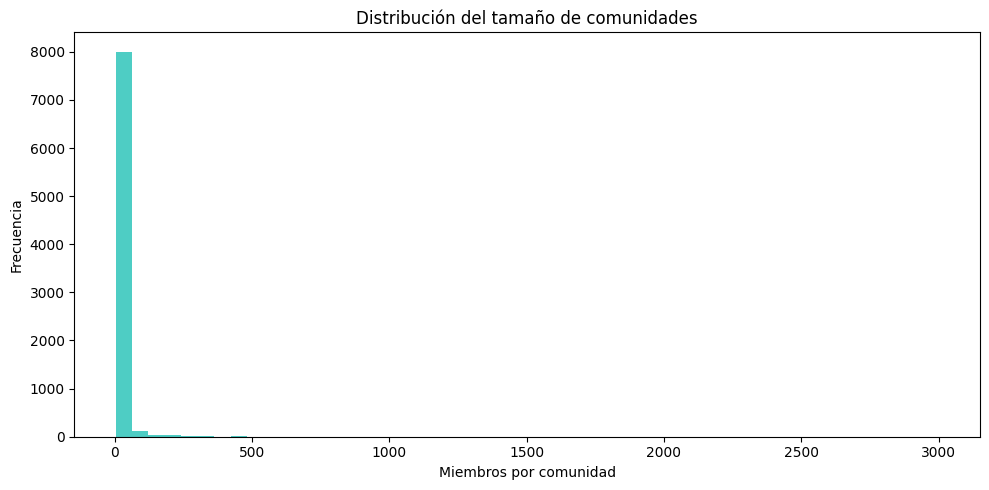

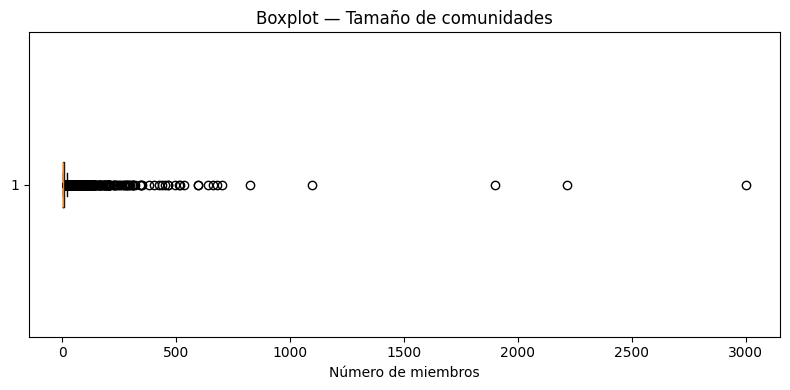

📸 Imágenes guardadas:
  ├─ /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/hist_tamano_comunidades.png
  └─ /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/box_tamano_comunidades.png


In [36]:
plt.figure(figsize=(10,5))
filtered_df["size_cleaned"].plot(kind="hist", bins=50, color="#4ECDC4")
plt.title("Distribución del tamaño de comunidades")
plt.xlabel("Miembros por comunidad"); plt.ylabel("Frecuencia")
hist_path = os.path.join(FIG_DIR, "hist_tamano_comunidades.png")
plt.tight_layout(); plt.savefig(hist_path, dpi=140); plt.show()

plt.figure(figsize=(8,4))
plt.boxplot(filtered_df["size_cleaned"], vert=False)
plt.title("Boxplot — Tamaño de comunidades")
plt.xlabel("Número de miembros")
box_path = os.path.join(FIG_DIR, "box_tamano_comunidades.png")
plt.tight_layout(); plt.savefig(box_path, dpi=140); plt.show()

print("📸 Imágenes guardadas:")
print("  ├─", hist_path)
print("  └─", box_path)



In [ ]:
USE_NO_OUTLIERS = True
MAX_COMMUNITY_SIZE = 200

path = clean_no_out_path if USE_NO_OUTLIERS else clean_path
coms = pd.read_csv(path)
print(" Comunidades cargadas:", len(coms))

def members_from_row(s): return [x for x in str(s).split() if x]

edge_counter, skipped = Counter(), 0
for _, row in tqdm(coms.iterrows(), total=len(coms), desc="Generando relaciones"):
    members = members_from_row(row["members"])
    if len(members) > MAX_COMMUNITY_SIZE:
        members = members[:MAX_COMMUNITY_SIZE]; skipped += 1
    for a, b in combinations(sorted(members), 2):
        edge_counter[(a,b)] += 1

edges_df = pd.DataFrame([(a,b,w) for (a,b),w in edge_counter.items()],
                        columns=["source","target","weight"])
edges_path = os.path.join(PROC_DIR, "youtube_edges.csv")
edges_df.to_csv(edges_path, index=False)
print(f" Edges generados: {len(edges_df)} | Guardados en {edges_path}")
print("Comunidades recortadas:", skipped)
edges_df.head()


📊 Comunidades cargadas: 7336


Generando relaciones: 100%|██████████| 7336/7336 [00:00<00:00, 41858.36it/s]


✅ Edges generados: 146022 | Guardados en /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed/youtube_edges.csv
Comunidades recortadas: 0


,source,target,weight
0,1,24047,1
1,1,3,1
2,1,33897,1
3,1,36675,1
4,1,5,2


In [ ]:
G = nx.from_pandas_edgelist(edges_df, "source", "target", edge_attr="weight")
deg, wdeg = dict(G.degree()), dict(G.degree(weight="weight"))

nodes_df = pd.DataFrame({
    "node": list(G.nodes()),
    "degree": [deg[n] for n in G.nodes()],
    "weighted_degree": [wdeg[n] for n in G.nodes()]
}).sort_values("weighted_degree", ascending=False)

nodes_path = os.path.join(PROC_DIR, "youtube_nodes.csv")
nodes_df.to_csv(nodes_path, index=False)
print(" Nodos guardados en:", nodes_path)
nodes_df.head(10)


📄 Nodos guardados en: /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed/youtube_nodes.csv


,node,degree,weighted_degree
351,68028,274,854
350,33788,295,802
3313,117306,399,743
2704,2711,405,710
605,11850,470,692
352,7682,222,580
353,118817,251,570
2657,27260,388,537
3346,93053,277,482
2605,21303,321,445


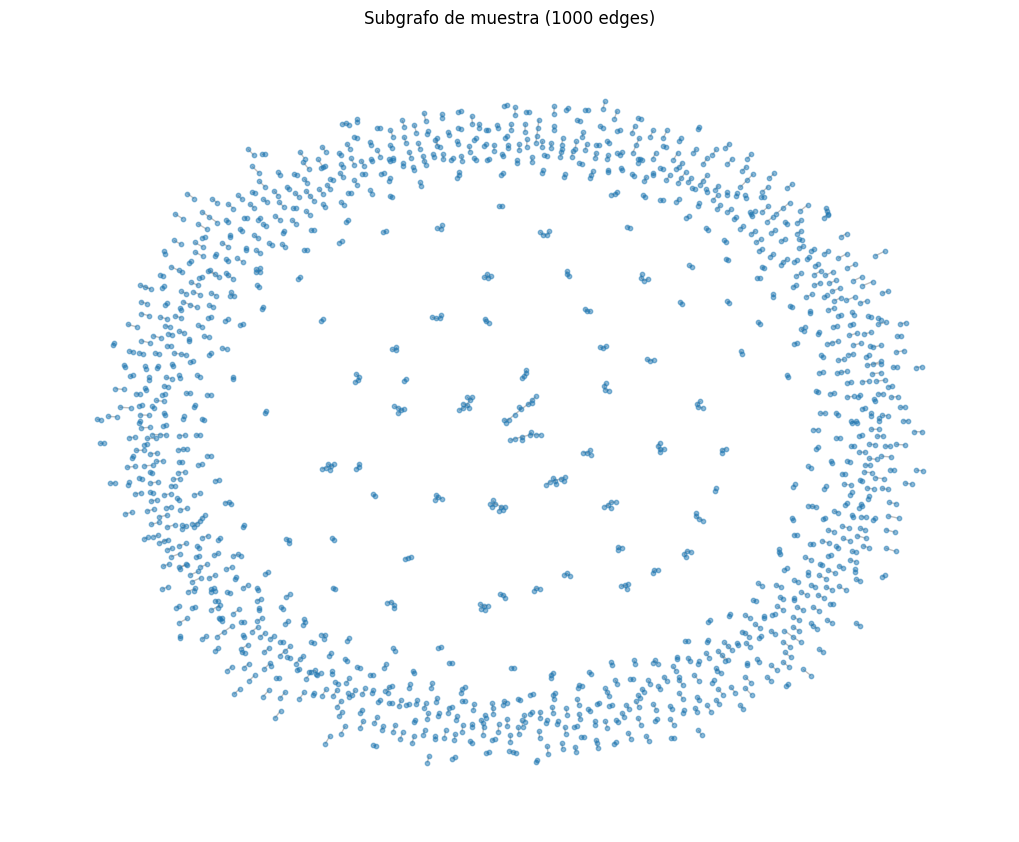

In [39]:
sample = edges_df.sample(1000)
G_small = nx.from_pandas_edgelist(sample, "source", "target")
plt.figure(figsize=(10,8))
nx.draw(G_small, node_size=10, edge_color="gray", alpha=0.5)
plt.title("Subgrafo de muestra (1000 edges)")
plt.show()


### Visualizaciones

In [40]:
# clean_relational_data.py
import pandas as pd
import numpy as np
import os
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# --- Configuración de Rutas ---
ROOT = "/content" if os.path.exists("/content") else os.getcwd()
PROC_DIR = os.path.join(ROOT, "data", "processed")
nodes_path = os.path.join(PROC_DIR, "youtube_nodes.csv")

# Archivos de salida
LINKAGE_MATRIX_PATH = os.path.join(PROC_DIR, "linkage_matrix.npy")
NODE_LABELS_PATH = os.path.join(PROC_DIR, "dendrogram_node_labels.csv")

def prepare_dendrogram_hierarchy(nodes_df: pd.DataFrame, n_nodes=100):
    """Calcula la matriz de linkage (Z) para Clustering Jerárquico en los N nodos más importantes."""
    print(f"-> Calculando jerarquía de clustering para los {n_nodes} nodos principales...")

    n_nodes = min(n_nodes, len(nodes_df))
    top_nodes = nodes_df.head(n_nodes).copy()

    features = top_nodes[["degree", "weighted_degree"]].values
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    dist_matrix = pdist(scaled_features, metric='euclidean')
    Z = linkage(dist_matrix, 'ward')

    np.save(LINKAGE_MATRIX_PATH, Z)
    top_nodes[['node']].to_csv(NODE_LABELS_PATH, index=False)

    print(f" Matriz Z y etiquetas para Dendrograma guardadas.")
    return Z

# --- Ejecución Principal ---
if __name__ == "__main__":
    print("==============================================")
    print("🧹 FASE 1: PREPARACIÓN DE JERARQUÍA DE CLUSTERING (DENDROGRAMA)")
    print("==============================================")

    try:
        nodes_df = pd.read_csv(nodes_path)
    except FileNotFoundError as e:
        print(f" Error al cargar nodos. Asegúrate de que {nodes_path} exista.")
        exit()

    prepare_dendrogram_hierarchy(nodes_df, n_nodes=100)

🧹 FASE 1: PREPARACIÓN DE JERARQUÍA DE CLUSTERING (DENDROGRAMA)
-> Calculando jerarquía de clustering para los 100 nodos principales...
 Matriz Z y etiquetas para Dendrograma guardadas.


In [ ]:
# prepare_relational_data.py
import pandas as pd
import os

# --- Configuración de Rutas ---
ROOT = "/content" if os.path.exists("/content") else os.getcwd()
PROC_DIR = os.path.join(ROOT, "data", "processed")
clean_no_out_path = os.path.join(PROC_DIR, "youtube_clean_no_outliers.csv")

# Archivo de salida
HIERARCHY_TREEMAP_PATH = os.path.join(PROC_DIR, "hierarchy_treemap.csv")

def prepare_categorical_hierarchy(coms_df: pd.DataFrame):
    """Crea una jerarquía artificial de tres niveles para Treemaps y Sunbursts."""
    print("-> Creando jerarquía categórica para Treemap/Sunburst...")

    df = coms_df.copy()

    # Nivel 2: Grupo de tamaño
    def size_group(size):
        if size >= 15:
            return "Grandes (>=15)"
        elif size >= 8:
            return "Medianas (8-14)"
        else:
            return "Pequeñas (3-7)"

    df["size_group"] = df["size_cleaned"].apply(size_group)

    # Nivel 1: Raíz global
    df["Root"] = "Comunidades_YouTube"

    hierarchy_df = df.groupby(["Root", "size_group", "community_id"])["size_cleaned"].sum().reset_index(name="members_count")

    hierarchy_df.to_csv(HIERARCHY_TREEMAP_PATH, index=False)
    print(f" Jerarquía Treemap/Sunburst guardada en: {HIERARCHY_TREEMAP_PATH}")
    return hierarchy_df

# --- Ejecución Principal ---
if __name__ == "__main__":
    print("==============================================")
    print("🧹 FASE 2: PREPARACIÓN DE JERARQUÍA CATEGÓRICA (TREEMAP/SUNBURST)")
    print("==============================================")

    try:
        coms_df = pd.read_csv(clean_no_out_path)
    except FileNotFoundError as e:
        print(f" Error al cargar comunidades. Asegúrate de que {clean_no_out_path} exista.")
        exit()

    prepare_categorical_hierarchy(coms_df)

🧹 FASE 2: PREPARACIÓN DE JERARQUÍA CATEGÓRICA (TREEMAP/SUNBURST)
-> Creando jerarquía categórica para Treemap/Sunburst...
 Jerarquía Treemap/Sunburst guardada en: /Users/janeth/Visual Modeling for Info/Checkpoint3/data/processed/hierarchy_treemap.csv


In [ ]:
# generate_relational_viz.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify # Usado para Treemap
from scipy.cluster.hierarchy import dendrogram
import os

# --- Configuración de Rutas ---
ROOT = "/content" if os.path.exists("/content") else os.getcwd()
PROC_DIR = os.path.join(ROOT, "data", "processed")
FIG_DIR = os.path.join(ROOT, "reports", "figures")
LINKAGE_MATRIX_PATH = os.path.join(PROC_DIR, "linkage_matrix.npy")
HIERARCHY_TREEMAP_PATH = os.path.join(PROC_DIR, "hierarchy_treemap.csv")
NODE_LABELS_PATH = os.path.join(PROC_DIR, "dendrogram_node_labels.csv")

# --- Funciones de Visualización ---

def plot_dendrogram(Z: np.ndarray, title="🌳 Dendrograma de Nodos Principales"):
    """Dibuja el Dendrograma con Matplotlib."""
    labels_df = pd.read_csv(NODE_LABELS_PATH)
    node_labels = labels_df['node'].astype(str).tolist()

    plt.figure(figsize=(18, 7))
    plt.title(title)
    plt.xlabel("Nodo (ID de Usuario)"); plt.ylabel("Distancia de Cluster (Euclidiana)")

    dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=node_labels, color_threshold=3, above_threshold_color='#4C72B0')

    dendrogram_path = os.path.join(FIG_DIR, "viz_dendrogram.png")
    plt.grid(axis='y', linestyle='--'); plt.tight_layout()
    plt.savefig(dendrogram_path, dpi=140); plt.show() # Muestra en Colab
    plt.close()
    print(f"📸 Dendrograma guardado: {dendrogram_path}")

def plot_treemap(hierarchy_df: pd.DataFrame, title="🔳 Treemap: Distribución por Grupos de Tamaño"):
    """Genera el Treemap usando Squarify/Matplotlib."""

    # Agregación al Nivel 2: Grupos de Tamaño
    group_sizes = hierarchy_df.groupby("size_group")["members_count"].sum()
    labels = [f"{name}\nMiembros: {size:,}" for name, size in group_sizes.items()]
    colors = plt.cm.Set3(np.linspace(0, 1, len(group_sizes)))

    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=group_sizes.values, label=labels, color=colors, alpha=0.8, pad=True, text_kwargs={'fontsize':10, 'color':'black'})

    treemap_path = os.path.join(FIG_DIR, "viz_treemap_squarify.png")
    plt.title(title, fontsize=14)
    plt.axis('off'); plt.tight_layout()
    plt.savefig(treemap_path, dpi=140); plt.show() # Muestra en Colab
    plt.close()
    print(f"📸 Treemap (Squarify) guardado: {treemap_path}")

def plot_sunburst_approximation(hierarchy_df: pd.DataFrame, title=" Aproximación Circular (Sunburst)"):
    """
    Simula la estructura jerárquica radial usando un gráfico de pastel anidado o un gráfico de rosquilla,
    ya que no hay una implementación simple y estable de Sunburst en Matplotlib puro.
    Usaremos el Nivel 2 (Grupos de tamaño) para el anillo exterior.
    """
    print("\n Plotly se reemplaza por una gráfica de rosquilla (Donut Chart) de Matplotlib para la visualización circular.")

    group_data = hierarchy_df.groupby("size_group")["members_count"].agg(['sum', 'count']).reset_index()

    # Datos del anillo exterior (Grupos)
    sizes = group_data['sum']
    labels = group_data['size_group']

    # Generar la paleta de colores
    cmap = plt.get_cmap("Pastel2")
    outer_colors = cmap(np.arange(len(sizes)))

    fig, ax = plt.subplots(figsize=(8, 8))

    # Anillo exterior (Grupos de tamaño)
    wedges, texts, autotexts = ax.pie(sizes, radius=1, labels=labels, colors=outer_colors,
                                      autopct='%1.1f%%', pctdistance=0.85, startangle=90,
                                      wedgeprops=dict(width=0.3, edgecolor='w'))

    # Centro vacío para hacer un 'donut'
    centre_circle = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=0)
    fig.gca().add_artist(centre_circle)

    ax.set_title(title, fontsize=14, y=1.05)
    ax.axis('equal')  # Asegura que el pastel sea un círculo.

    sunburst_path = os.path.join(FIG_DIR, "viz_donut_approximation.png")
    plt.tight_layout()
    plt.savefig(sunburst_path, dpi=140); plt.show() # Muestra en Colab
    plt.close()
    print(f"📸 Sunburst/Circular Aproximación guardada: {sunburst_path}")

 EJECUCIÓN PRINCIPAL: GENERACIÓN DE VISUALIZACIONES
Matriz Z cargada. Fusiones: 99
Jerarquía Treemap cargada. Filas: 7336

--- Generando Gráficos ---


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:31: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.grid(axis='y', linestyle='--'); plt.tight_layout()
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:32: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.savefig(dendrogram_path, dpi=140); plt.show() # Muestra en Colab
/Users/janeth/Visual Modeling for Info/Checkpoint3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


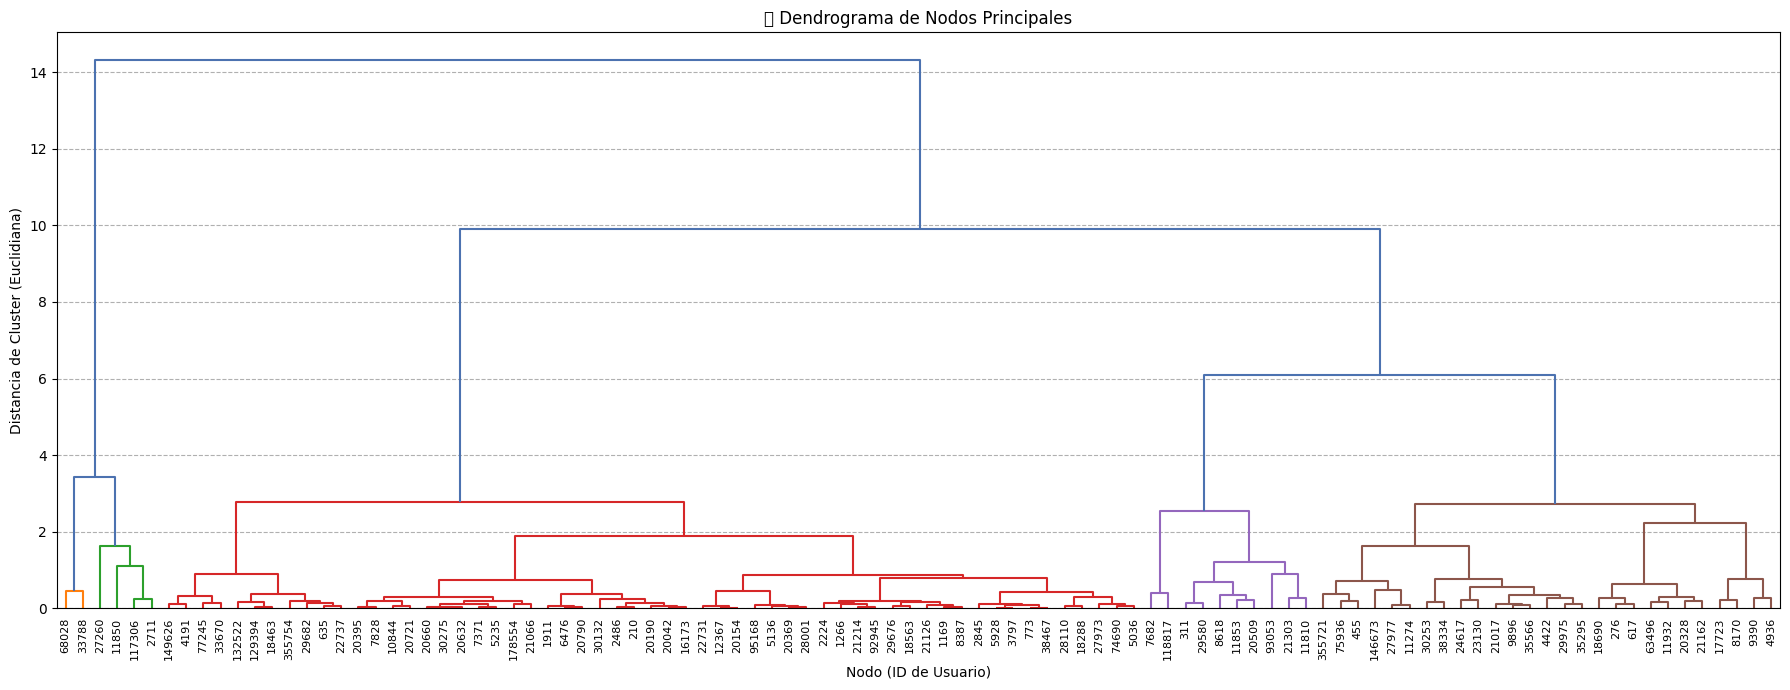

📸 Dendrograma guardado: /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/viz_dendrogram.png


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:49: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  plt.axis('off'); plt.tight_layout()
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:50: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  plt.savefig(treemap_path, dpi=140); plt.show() # Muestra en Colab
/Users/janeth/Visual Modeling for Info/Checkpoint3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


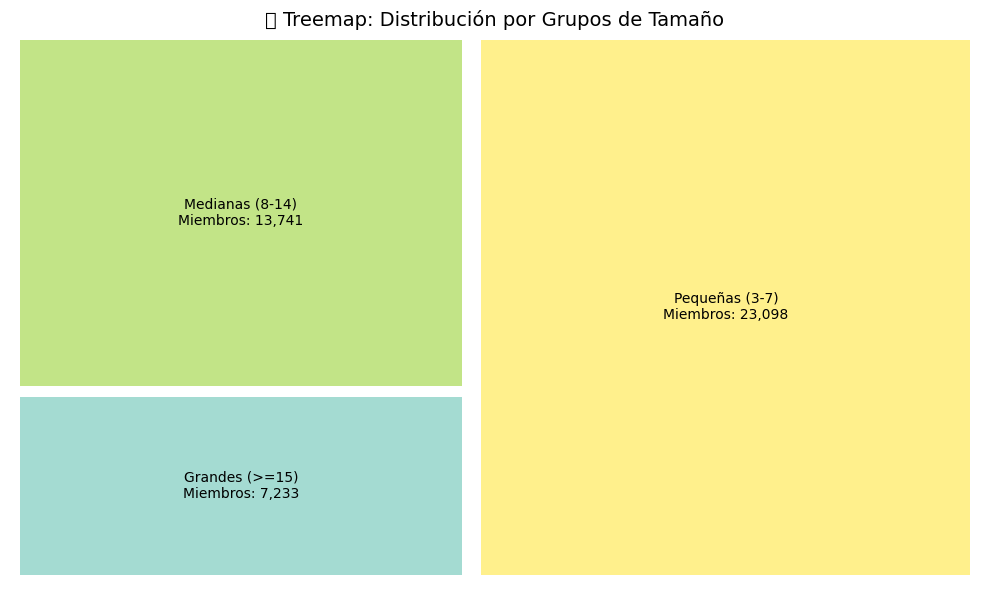

📸 Treemap (Squarify) guardado: /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/viz_treemap_squarify.png

⚠️ Plotly se reemplaza por una gráfica de rosquilla (Donut Chart) de Matplotlib para la visualización circular.


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:87: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:88: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig(sunburst_path, dpi=140); plt.show() # Muestra en Colab
/Users/janeth/Visual Modeling for Info/Checkpoint3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


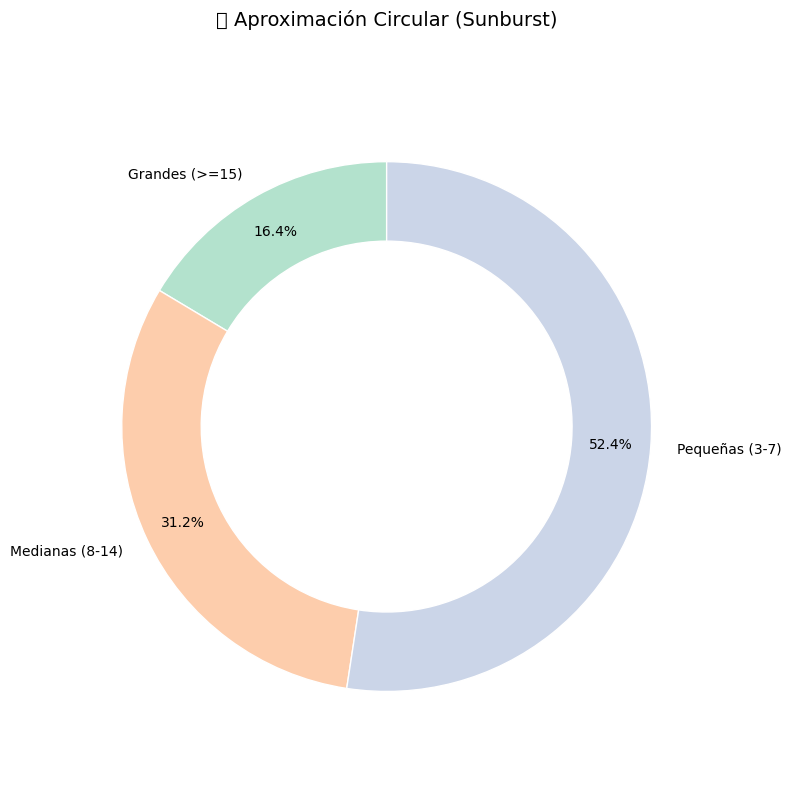

📸 Sunburst/Circular Aproximación guardada: /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/viz_donut_approximation.png

 Finalizada la generación de visualizaciones.


In [43]:
# generate_relational.py
import pandas as pd
import numpy as np
import os
import sys

# --- Configuración de Rutas ---
ROOT = "/content" if os.path.exists("/content") else os.getcwd()
PROC_DIR = os.path.join(ROOT, "data", "processed")
LINKAGE_MATRIX_PATH = os.path.join(PROC_DIR, "linkage_matrix.npy")
HIERARCHY_TREEMAP_PATH = os.path.join(PROC_DIR, "hierarchy_treemap.csv")

# ⚠️ EN UN ENTORNO COLAB: Las funciones plot_XXX deben estar definidas en una celda anterior.
# Aquí asumimos que las funciones están definidas.

def run_visualizations():
    print("==============================================")
    print(" EJECUCIÓN PRINCIPAL: GENERACIÓN DE VISUALIZACIONES")
    print("==============================================")

    # 1. Cargar Jerarquía de Clustering (Dendrograma)
    try:
        Z = np.load(LINKAGE_MATRIX_PATH)
        print(f"Matriz Z cargada. Fusiones: {Z.shape[0]}")
    except FileNotFoundError:
        print(" Matriz Z no encontrada. Ejecuta 'clean_relational_data.py' primero.")
        return

    # 2. Cargar Jerarquía Categórica (Treemap/Sunburst)
    try:
        hierarchy_df = pd.read_csv(HIERARCHY_TREEMAP_PATH)
        print(f"Jerarquía Treemap cargada. Filas: {len(hierarchy_df)}")
    except FileNotFoundError:
        print(" Jerarquía Treemap no encontrada. Ejecuta 'prepare_relational_data.py' primero.")
        return

    # --- Generación de Visualizaciones ---
    print("\n--- Generando Gráficos ---")

    # 1. Dendrograma
    plot_dendrogram(Z)

    # 2. Treemap
    plot_treemap(hierarchy_df)

    # 3. Sunburst / Circular Treemap (Aproximación con Donut Chart)
    plot_sunburst_approximation(hierarchy_df)

    print("\n Finalizada la generación de visualizaciones.")

if __name__ == "__main__":
    run_visualizations()

In [44]:
!pip install kaleido

🚀 EJECUCIÓN PRINCIPAL: GENERACIÓN DE VISUALIZACIONES
Matriz Z cargada. Fusiones: 99
Jerarquía Treemap cargada. Filas: 7336

--- Generando Gráficos ---


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:31: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.grid(axis='y', linestyle='--'); plt.tight_layout()
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:32: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  plt.savefig(dendrogram_path, dpi=140); plt.show() # Muestra en Colab
/Users/janeth/Visual Modeling for Info/Checkpoint3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


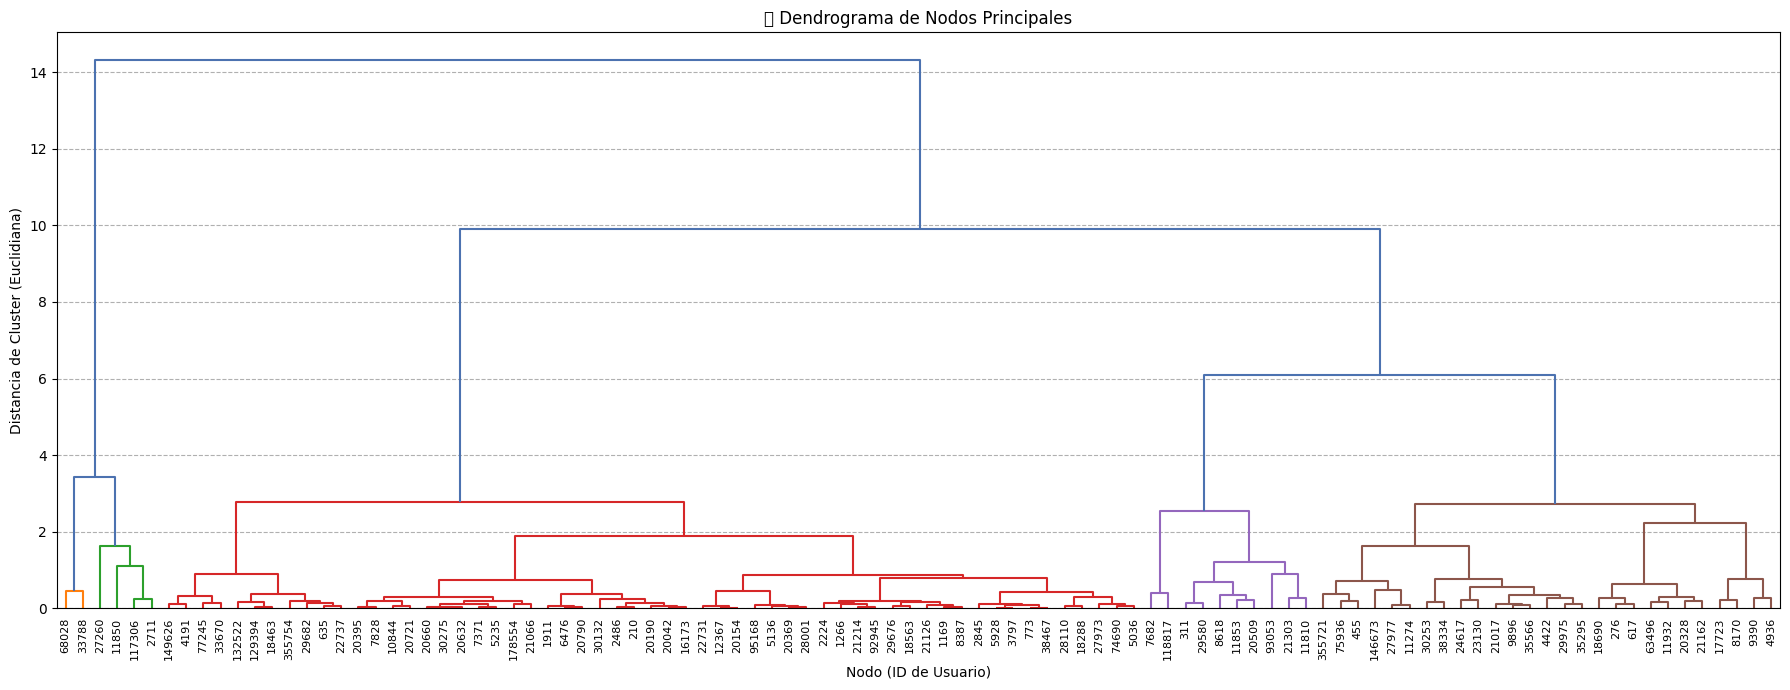

📸 Dendrograma guardado: /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/viz_dendrogram.png


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:49: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  plt.axis('off'); plt.tight_layout()
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:50: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  plt.savefig(treemap_path, dpi=140); plt.show() # Muestra en Colab
/Users/janeth/Visual Modeling for Info/Checkpoint3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128307 (\N{WHITE SQUARE BUTTON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


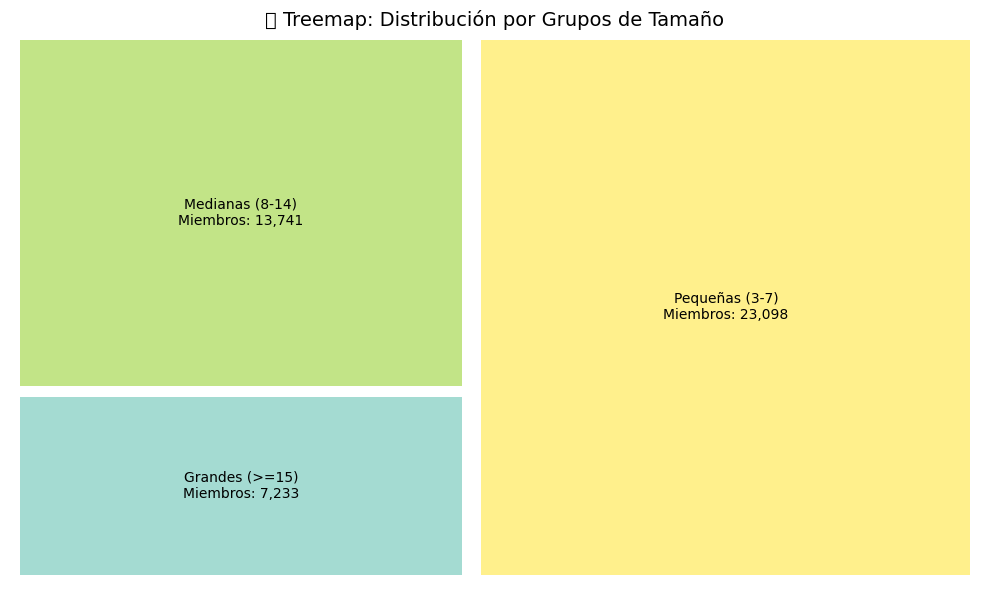

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:87: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_94081/3647563096.py:88: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig(sunburst_path, dpi=140); plt.show() # Muestra en Colab
/Users/janeth/Visual Modeling for Info/Checkpoint3/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11093 (\N{HEAVY LARGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


📸 Treemap (Squarify) guardado: /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/viz_treemap_squarify.png

⚠️ Plotly se reemplaza por una gráfica de rosquilla (Donut Chart) de Matplotlib para la visualización circular.


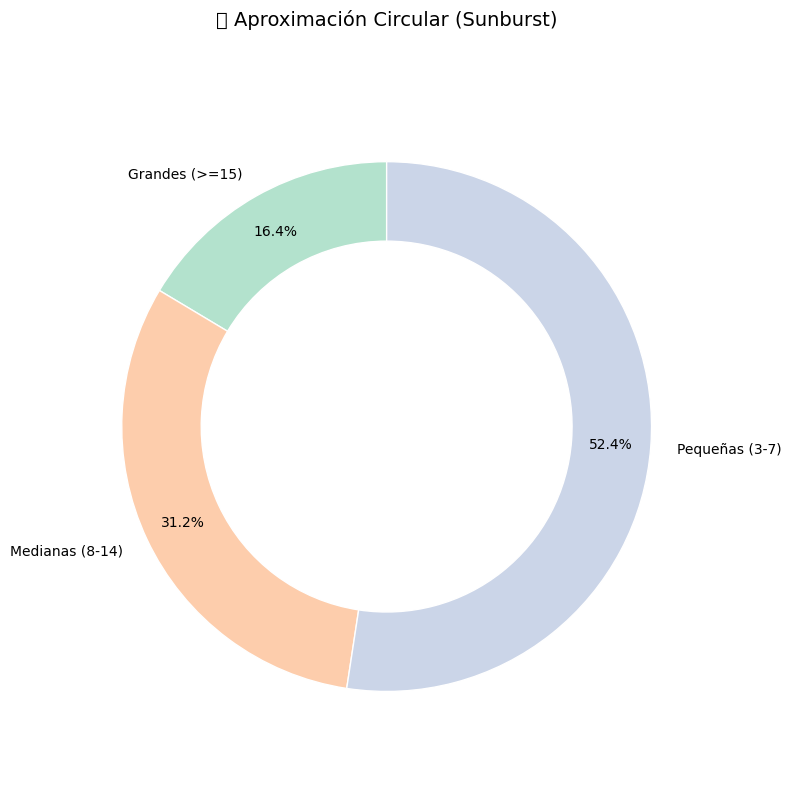

📸 Sunburst/Circular Aproximación guardada: /Users/janeth/Visual Modeling for Info/Checkpoint3/reports/figures/viz_donut_approximation.png

 Finalizada la generación de visualizaciones.


In [45]:
# generate_relational.py
import pandas as pd
import numpy as np
import os
import sys

# --- Configuración de Rutas ---
ROOT = "/content" if os.path.exists("/content") else os.getcwd()
PROC_DIR = os.path.join(ROOT, "data", "processed")
LINKAGE_MATRIX_PATH = os.path.join(PROC_DIR, "linkage_matrix.npy")
HIERARCHY_TREEMAP_PATH = os.path.join(PROC_DIR, "hierarchy_treemap.csv")

# ⚠️ EN UN ENTORNO COLAB: Las funciones plot_XXX deben estar definidas en una celda anterior.
# Aquí asumimos que las funciones están definidas.

def run_visualizations():
    print("==============================================")
    print("🚀 EJECUCIÓN PRINCIPAL: GENERACIÓN DE VISUALIZACIONES")
    print("==============================================")

    # 1. Cargar Jerarquía de Clustering (Dendrograma)
    try:
        Z = np.load(LINKAGE_MATRIX_PATH)
        print(f"Matriz Z cargada. Fusiones: {Z.shape[0]}")
    except FileNotFoundError:
        print(" Matriz Z no encontrada. Ejecuta 'clean_relational_data.py' primero.")
        return

    # 2. Cargar Jerarquía Categórica (Treemap/Sunburst)
    try:
        hierarchy_df = pd.read_csv(HIERARCHY_TREEMAP_PATH)
        print(f"Jerarquía Treemap cargada. Filas: {len(hierarchy_df)}")
    except FileNotFoundError:
        print(" Jerarquía Treemap no encontrada. Ejecuta 'prepare_relational_data.py' primero.")
        return

    # --- Generación de Visualizaciones ---
    print("\n--- Generando Gráficos ---")

    # 1. Dendrograma
    plot_dendrogram(Z)

    # 2. Treemap
    plot_treemap(hierarchy_df)

    # 3. Sunburst / Circular Treemap (Aproximación con Donut Chart)
    plot_sunburst_approximation(hierarchy_df)

    print("\n Finalizada la generación de visualizaciones.")

if __name__ == "__main__":
    run_visualizations()